In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import requests

/Users/deeppatel/Desktop/Meditation/Thesis/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
df_up = pd.read_csv("TF_Alu_Up.csv")

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/3517011406.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_up = pd.read_csv("TF_Alu_Up.csv")


In [10]:
gene_expression = pd.read_csv("DE_Sig_v1.csv")
gene_expression = gene_expression[['Object_name','chr','start','end','log2FoldChange']]

In [15]:
# Merge the two dataframes
df_up = pd.merge(df_up, gene_expression, on='Object_name', how='left')

In [13]:
#Rename the lncRNA column to Object_name
df_up.rename(columns={'lncRNA':'Object_name'}, inplace=True)

In [17]:
df_up['motif_enrichment'] = (df_up['TF_end'] - df_up['TF_start']) / (df_up['Alu_end'] - df_up['Alu_start'])

In [18]:
df_up

,Object_name,chr_x,lncRNA_start,lncRNA_end,Alu,Alu_strand,Alu_chr,Alu_start,Alu_end,TF_Name,...,Score,TF_strand,TF_chr,TF_start,TF_end,chr_y,start,end,log2FoldChange,motif_enrichment
0,LAP3,4,17577198,17607972,AluSx,-,4,17572238,17572417,MA1721.1,...,647,-,chr4,17572223,17572239,4,17577198,17607972,1.192122,0.089385
1,LAP3,4,17577198,17607972,AluSx,-,4,17572238,17572417,MA1721.1,...,500,-,chr4,17572226,17572242,4,17577198,17607972,1.192122,0.089385
2,LAP3,4,17577198,17607972,AluSx,-,4,17572238,17572417,MA0517.1,...,458,+,chr4,17572242,17572257,4,17577198,17607972,1.192122,0.083799
3,LAP3,4,17577198,17607972,AluSx,-,4,17572238,17572417,MA1709.1,...,441,-,chr4,17572242,17572257,4,17577198,17607972,1.192122,0.083799
4,LAP3,4,17577198,17607972,AluSx,-,4,17572238,17572417,MA0687.1,...,444,-,chr4,17572243,17572257,4,17577198,17607972,1.192122,0.078212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95048,CTAGE4,7,144183466,144186080,FAM,+,7,144180575,144180749,MA1125.1,...,474,-,chr7,144180734,144180746,7,144183466,144186080,1.518118,0.068966
95049,CTAGE4,7,144183466,144186080,FAM,+,7,144180575,144180749,MA0497.1,...,449,+,chr7,144180737,144180752,7,144183466,144186080,1.518118,0.086207
95050,CTAGE4,7,144183466,144186080,FAM,+,7,144180575,144180749,MA1125.1,...,449,+,chr7,144180738,144180750,7,144183466,144186080,1.518118,0.068966
95051,CTAGE4,7,144183466,144186080,FAM,+,7,144180575,144180749,MA0052.4,...,437,+,chr7,144180738,144180753,7,144183466,144186080,1.518118,0.086207


In [27]:
stats_up = pd.DataFrame(columns=['TF','estimate','confidence interval','p-value'])
for motif in df_up['TF_Name'].unique():
    subset_data = df_up[df_up['TF_Name'] == motif]
    model = sm.formula.ols("Q('log2FoldChange') ~ Q('motif_enrichment')", data=subset_data).fit()
    #stats_up = stats_up.append({'TF':motif,'Score':model.rsquared,'estimate':model.params[1],'confidence interval':model.conf_int()[1][0],'p-value':model.pvalues[1]}, ignore_index=True)
    estimate = model.params["Q('motif_enrichment')"]
    confidence_interval = model.conf_int()[1][0]
    p_value = model.pvalues["Q('motif_enrichment')"]
    # score = df_up[df_up['Object_name'] == motif]['motif_enrichment'].mean()
    row = [motif, estimate, confidence_interval, p_value]
    stats_up.loc[len(stats_up)] = row

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/4079551856.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confidence_interval = model.conf_int()[1][0]
/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/4079551856.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confidence_interval = model.conf_int()[1][0]
/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/4079551856.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value 

In [34]:
#Drop the NaN values
stats_up = stats_up.dropna()
#Reset the index
stats_up = stats_up.reset_index(drop=True)
#Sort the dataframe by the p-value
stats_up = stats_up.sort_values(by=['confidence interval'])

In [36]:
#Filter the dataframe by the p-value < 0.05
stats_up = stats_up[stats_up['p-value'] < 0.05]

In [38]:
#Reset the index
stats_up = stats_up.reset_index(drop=True)

In [40]:
stats_up.to_csv("TF_Alu_Up_Stats.csv", index=False)

In [42]:
df_down = pd.read_csv("TF_Alu_Down.csv")

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/1262328092.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_down = pd.read_csv("TF_Alu_Down.csv")


In [43]:
# Merge the two dataframes
df_down = pd.merge(df_down, gene_expression, on='Object_name', how='left')

In [45]:
df_down['motif_enrichment'] = (df_down['TF_end'] - df_down['TF_start']) / (df_down['Alu_end'] - df_down['Alu_start'])

In [46]:
stats_down = pd.DataFrame(columns=['TF','estimate','confidence interval','p-value'])
for motif in df_down['TF_Name'].unique():
    subset_data = df_down[df_down['TF_Name'] == motif]
    model = sm.formula.ols("Q('log2FoldChange') ~ Q('motif_enrichment')", data=subset_data).fit()
    #stats_down = stats_down.append({'TF':motif,'Score':model.rsquared,'estimate':model.params[1],'confidence interval':model.conf_int()[1][0],'p-value':model.pvalues[1]}, ignore_index=True)
    estimate = model.params["Q('motif_enrichment')"]
    confidence_interval = model.conf_int()[1][0]
    p_value = model.pvalues["Q('motif_enrichment')"]
    # score = df_down[df_down['Object_name'] == motif]['motif_enrichment'].mean()
    row = [motif, estimate, confidence_interval, p_value]
    stats_down.loc[len(stats_down)] = row

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/642563214.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confidence_interval = model.conf_int()[1][0]
/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/642563214.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confidence_interval = model.conf_int()[1][0]
/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/642563214.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

In [47]:
stats_down = stats_down.dropna()
stats_down = stats_down.reset_index(drop=True)
# stats_down = stats_down.sort_values(by=['confidence interval'])
stats_down = stats_down[stats_down['p-value'] < 0.05]
stats_down = stats_down.reset_index(drop=True)
stats_down = stats_down.sort_values(by=['confidence interval'])

In [49]:
stats_down.to_csv("TF_Alu_Down_Stats.csv", index=False)

### Working on LINC02574

In [50]:
lnc = pd.read_csv("TF_Alu_lnc.csv")

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_4473/3718971855.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  lnc = pd.read_csv("TF_Alu_lnc.csv")


In [52]:
#Filter LINC02574
lnc = lnc[lnc['lncRNA'] == 'LINC02574']

In [54]:
lnc_motif = lnc['TF_Name'].unique()

In [55]:
#Filter the dataframe by the p-value < 0.05
#stats_up = stats_up[stats_up['TF'].isin(lnc_motif)]
stats_down[stats_down['TF'].isin(lnc_motif)]

,TF,estimate,confidence interval,p-value
34,MA0095.3,22.647224,-1.671686,1.690928e-05
64,MA0703.2,32.283142,-1.412660,2.982573e-04
79,MA0702.2,44.389321,-1.412660,2.982573e-04
83,MA0725.1,44.711621,-1.404453,3.552043e-04
84,MA0726.1,44.711621,-1.404453,3.552043e-04
22,MA2041.1,12.313315,-1.343915,3.906328e-04
65,MA0634.1,35.524544,-1.243927,6.828797e-04
45,MA2020.1,25.971124,-1.205691,1.746559e-03
81,MA0722.1,48.100669,-1.197529,1.423221e-03
69,MA0892.1,37.361067,-1.178793,1.237723e-03


In [56]:
stats_up[stats_up['TF'].isin(lnc_motif)]

,TF,estimate,confidence interval,p-value
46,MA0659.3,6.271271,1.230409,0.027679
50,MA0496.3,5.462980,1.273496,0.031730
51,MA1125.1,0.683078,1.280149,0.023202
52,MA1710.1,3.930168,1.280912,0.030039
64,MA1723.1,-0.863261,1.473024,0.000861
73,MA0136.3,-2.261864,1.881496,0.006407
76,MA0726.1,-24.203370,3.096191,0.040189
77,MA0725.1,-24.203370,3.096191,0.040189
78,MA0704.1,-26.578822,3.198662,0.034782
80,MA0702.2,-26.653922,3.252953,0.041455


#### Looking for the distribution of Alu across Upregulated and downregulated genes

In [17]:
df_up = pd.read_csv("DEG_up.csv")


In [18]:
df_up_alu = pd.DataFrame(columns = ['Object_Name','chr','start','end','log2FoldChange','pvalue','Alu','Alu_chr','Alu_start','Alu_end'])
for i in range(len(df_up)):
    api = "https://api.genome.ucsc.edu/getData/track?genome=hg38;track=rmsk;chrom="+str(df_up['chr'][i])+";start="+str(df_up['start'][i]-5000)+";end="+str(df_up['start'][i])
    r = requests.get(api)
    decoded = r.json()
    if 'rmsk' not in decoded.keys():
        continue
    elif len(decoded['rmsk']) > 0:
        for j in range(len(decoded['rmsk'])):
            if decoded['rmsk'][j]['repFamily'] == 'Alu':
                row = [df_up['Object_name'][i],df_up['chr'][i],df_up['start'][i],df_up['end'][i],df_up['log2FoldChange'][i],df_up['pvalue'][i],decoded['rmsk'][j]['repName'],decoded['rmsk'][j]['genoName'],decoded['rmsk'][j]['genoStart'],decoded['rmsk'][j]['genoEnd']]
                df_up_alu.loc[len(df_up_alu)] = row

In [19]:
df_up_alu .to_csv("DEG_up_Alu.csv", index=False)

In [20]:
df_up_alu

,Object_Name,chr,start,end,log2FoldChange,pvalue,Alu,Alu_chr,Alu_start,Alu_end
0,LAP3,4,17577198,17607972,1.192122,0.000104,AluSx,chr4,17572238,17572417
1,LAP3,4,17577198,17607972,1.192122,0.000104,AluY,chr4,17572417,17572727
2,LAP3,4,17577198,17607972,1.192122,0.000104,AluSx,chr4,17572727,17572862
3,LAP3,4,17577198,17607972,1.192122,0.000104,AluJb,chr4,17573760,17574050
4,LAP3,4,17577198,17607972,1.192122,0.000104,AluJb,chr4,17574947,17575220
...,...,...,...,...,...,...,...,...,...,...
1103,PRAL,16,67550815,67552935,1.480610,0.023714,AluSp,chr16,67550788,67551095
1104,SCO2,22,50523568,50526461,1.075790,0.000014,AluY,chr22,50519865,50520169
1105,SCO2,22,50523568,50526461,1.075790,0.000014,AluJb,chr22,50520240,50520553
1106,SCO2,22,50523568,50526461,1.075790,0.000014,AluSx,chr22,50520561,50520862


In [21]:
Alu_Density = []
for i in range(len(df_up)):
    df = df_up_alu[df_up_alu['Object_Name'] == df_up['Object_name'][i]]
    Alu_Density.append(sum(df['Alu_end'] - df['Alu_start']) / 5000)

df_up['Alu_Density'] = Alu_Density

In [23]:
df_up.to_csv("DEG_up_Alu_Density.csv", index=False)

In [24]:
df_down = pd.read_csv("DEG_down.csv")

df_down_alu = pd.DataFrame(columns = ['Object_Name','chr','start','end','log2FoldChange','pvalue','Alu','Alu_chr','Alu_start','Alu_end'])
for i in range(len(df_down)):
    api = "https://api.genome.ucsc.edu/getData/track?genome=hg38;track=rmsk;chrom="+str(df_down['chr'][i])+";start="+str(df_down['start'][i]-5000)+";end="+str(df_down['start'][i])
    r = requests.get(api)
    decoded = r.json()
    if 'rmsk' not in decoded.keys():
        continue
    elif len(decoded['rmsk']) > 0:
        for j in range(len(decoded['rmsk'])):
            if decoded['rmsk'][j]['repFamily'] == 'Alu':
                row = [df_down['Object_name'][i],df_down['chr'][i],df_down['start'][i],df_down['end'][i],df_down['log2FoldChange'][i],df_down['pvalue'][i],decoded['rmsk'][j]['repName'],decoded['rmsk'][j]['genoName'],decoded['rmsk'][j]['genoStart'],decoded['rmsk'][j]['genoEnd']]
                df_down_alu.loc[len(df_down_alu)] = row

df_down_alu.to_csv("DEG_down_Alu.csv", index=False)

In [33]:
Alu_Density = []
for i in range(len(df_down)):
    df = df_down_alu[df_down_alu['Object_Name'] == df_down['Object_name'][i]]
    Alu_Density.append(sum(df['Alu_end'] - df['Alu_start']) / 5000)

df_down['Alu_Density'] = Alu_Density

df_down.to_csv("DEG_down_Alu_Density.csv", index=False)

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_1910/2687407501.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_up['Alu_Density'], hist=True, kde=False,


Text(0, 0.5, 'Frequency')

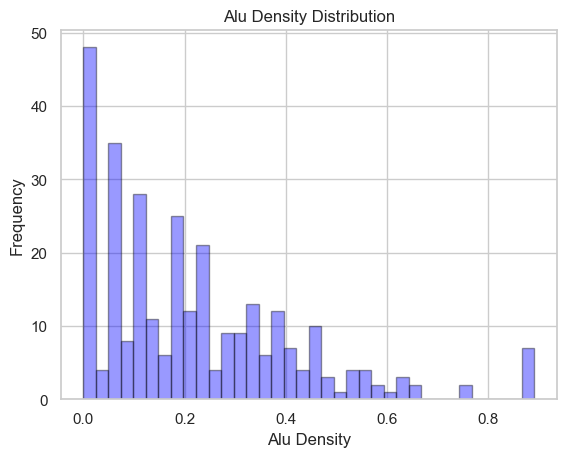

In [43]:
#Plot the Alu density
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the distribution of Alu density
sns.distplot(df_up['Alu_Density'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Alu Density Distribution')
plt.xlabel('Alu Density')
plt.ylabel('Frequency')


/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_1910/2692971081.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_down['Alu_Density'], hist=True, kde=False,


Text(0, 0.5, 'Frequency')

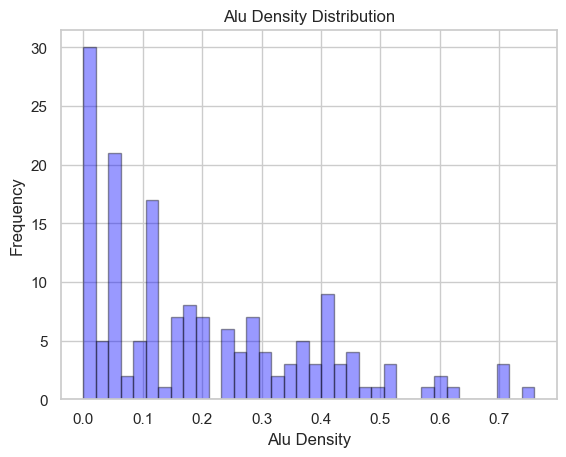

In [34]:
#Plot the distribution of Alu density

sns.distplot(df_down['Alu_Density'], hist=True, kde=False,
                bins=int(180/5), color = 'blue',
                hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Alu Density Distribution')
plt.xlabel('Alu Density')
plt.ylabel('Frequency')


In [32]:
df_down_alu

,Object_Name,chr,start,end,log2FoldChange,pvalue,Alu,Alu_chr,Alu_start,Alu_end
0,ARHGAP33,19,35774532,35788822,-1.944993,0.01453,AluY,chr19,35769303,35769605
1,ARHGAP33,19,35774532,35788822,-1.944993,0.01453,AluSq2,chr19,35769727,35769897
2,ARHGAP33,19,35774532,35788822,-1.944993,0.01453,AluSx4,chr19,35769897,35770201
3,ARHGAP33,19,35774532,35788822,-1.944993,0.01453,AluSq2,chr19,35770201,35770337
4,ARHGAP33,19,35774532,35788822,-1.944993,0.01453,AluSx1,chr19,35770596,35770820
...,...,...,...,...,...,...,...,...,...,...
585,SLC7A14-AS1,3,170448639,170860993,-1.881764,0.01031,AluSx,chr3,170445224,170445526
586,SLC7A14-AS1,3,170448639,170860993,-1.881764,0.01031,AluYh3,chr3,170446275,170446439
587,SLC7A14-AS1,3,170448639,170860993,-1.881764,0.01031,AluJb,chr3,170446459,170446758
588,SLC7A14-AS1,3,170448639,170860993,-1.881764,0.01031,AluSx1,chr3,170447259,170447565


In [44]:
#Percentage of Genes with Alu
Up = len(df_up[df_up['Alu_Density'] > 0]) / len(df_up)
Down = len(df_down[df_down['Alu_Density'] > 0]) / len(df_down)

In [49]:
print("The percentage of genes which have Alu in the upstream region is: " + str(Up*100))
print("The percentage of genes which have Alu in the downstream region is: " + str(Down*100))

The percentage of genes which have Alu in the upstream region is: 84.38538205980066
The percentage of genes which have Alu in the downstream region is: 81.92771084337349


Text(0.5, 1.0, 'Alu Density vs log2FoldChange')

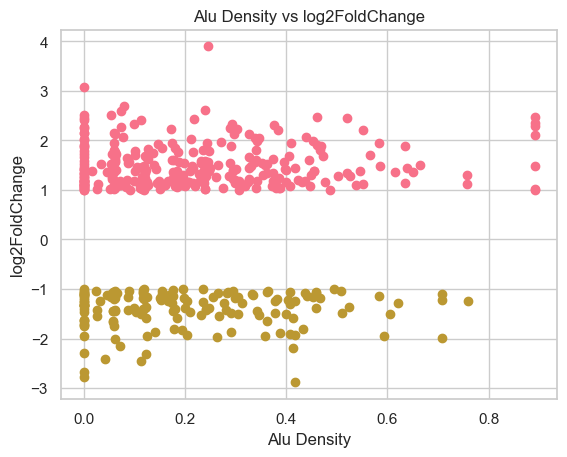

In [51]:
#Plot the scatter plot of Alu density vs log2FoldChange
plt.scatter(df_up['Alu_Density'], df_up['log2FoldChange'])
plt.xlabel('Alu Density')
plt.ylabel('log2FoldChange')
plt.title('Alu Density vs log2FoldChange')

plt.scatter(df_down['Alu_Density'], df_down['log2FoldChange'])
plt.xlabel('Alu Density')
plt.ylabel('log2FoldChange')
plt.title('Alu Density vs log2FoldChange')


#### 